# Dropout Regularization

Video number 20

Video = https://youtu.be/lcI8ukTUEbo?si=cipL7TjF4rKiair8

## Introduction
Regularization are technique used to prevent Overfitting.

Because when you have a Training data and sometime during Training we try to decrease our error so much so that the Weights becomes larger and your model will try to learn all the noises, fluctuations and unnessary stuff rather than trying to capture the underlying pattern.

Overfitting would make your model perform exceptionally well on the Training set but very poor on Testing set, meaning the model didnt generalize and have High variance.

So Regularization is a technique which we use to prevent Overfitting.

In ML there are different Regularization technique like L1 and L2 Regularization as we have seen in the ML PLaylist, today we will talk about another Regularization technique which is **Dropout Regularization**, it is one of the technique we use to tackle the Overfitting problem in Deep Learning

## Dropout Regularization Layer
Lets say we have NN here, in real life ofcourse u might have many many layers and neurons, but to make it simpler, lets say below is a Dense NN
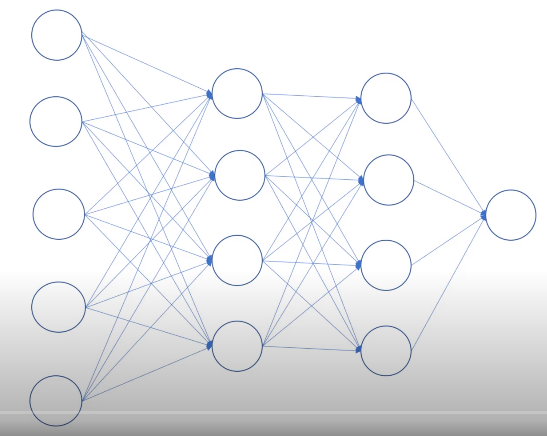
Now when u have this kind of Complex struture, then the NN will try to Overfit ur dataset, or it can also happen if u run too many Epochs.

One of the things we can do is, just randomly Drop some Neurons
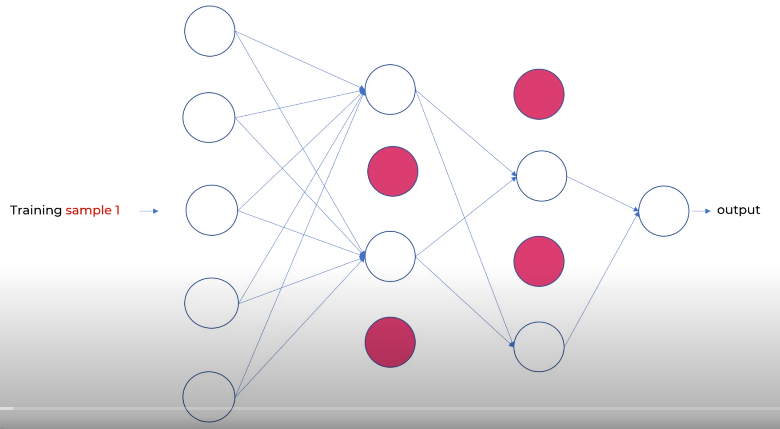

So from the firt hidden layer, lets say we Dropped those 2 Neurons which are marked in red then we also randomly dropped 2 neurons from the second hidden layer, keep in mind we are dropping them at random, doesnt matter which neurons u dropped! so here we are dropping at the rate of 50% cuz out of 4 we dropping 2.

So, there is this factor which u can specify when we are Creating a Dropout layer is at what rate u wanna drop, so if u say **0.5** then it means drop 50% of the neurons at random or if u say **0.2** and u have 10 neurons so it will drop only 20% means 2 out of 10 neurons.


Okay, so anyways, basically, u feed your first sample as input then radomly drop some layers, get the output
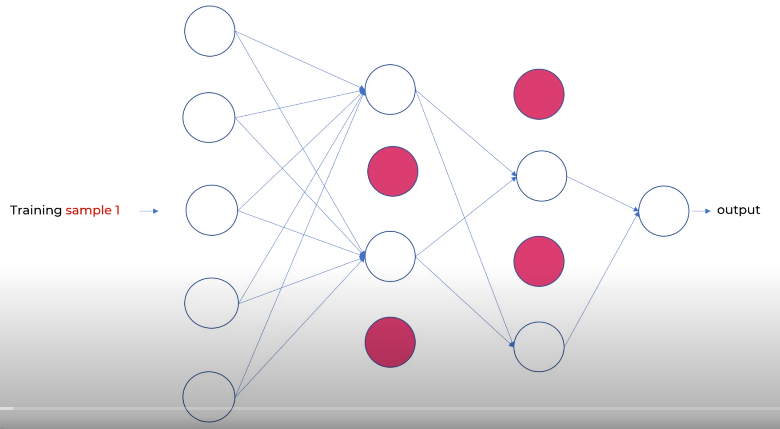
Then u do second sample and then again u randomly chose different set of neurons to drop
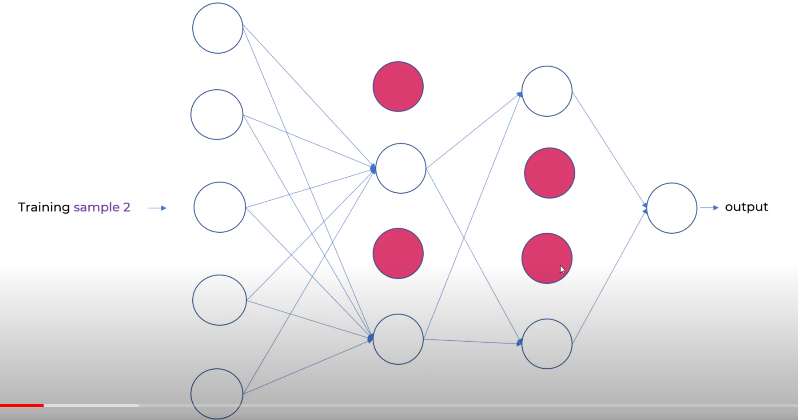
The dropout rate is also 0.5 here.

You can also have differet rates for different layers, lets say from first hidden layer u wanna drop 50% but in second layer 20%, etc...Its Trial and Error that which rate is best.

## Now, why will these random dropouts helps in preventing Overfitting?
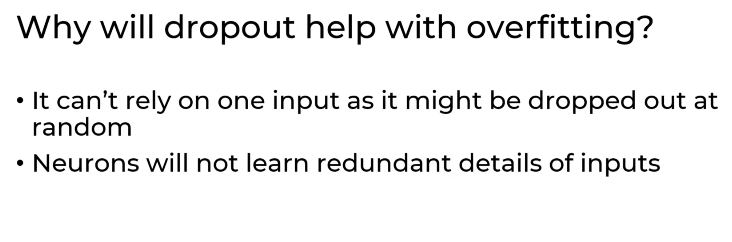
Because u are dropping different sets of neurons each time, now ur neurons wont rely on one input as it might be dropped randomly

For example, lets say this Neuron marked in Yellow below is relying heavily on these 4 neurons from previous layer, but since we are dropping lets say the 2 neuron it wont get any input from there, so this also prevents your neurons from being bias
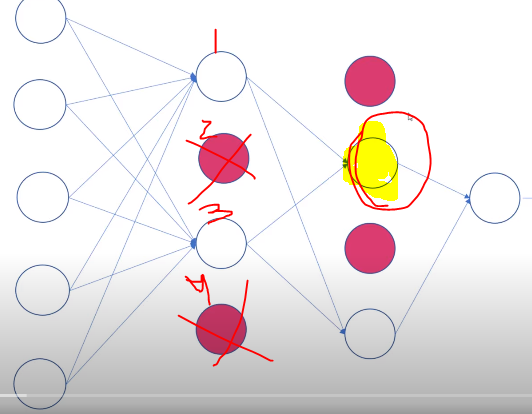
Because sometimes if u have prominent features, ur neurons might be bias with some specific feature and u dont want that, hence this Techniqur works!

## ------------------------------- Python Code -------------------------------

We are going to use this Binary Classification dataset from **UCI Machine Learning Repo**.

It tells u whether Sonar signals bounces off Metal cylinder or Roughly Cylindrical rock

**UCI ML link**: https://archive.ics.uci.edu/dataset/151/connectionist+bench+sonar+mines+vs+rocks

If u open this dataset u will see it has bunch of features and at the end it have a target variable which has value of either **R** (Rock) or **M** (Metal cylinder)

In [2]:
import pandas as pd
df = pd.read_csv("C:\\Users\\User\\OneDrive\\Documents\\Faiz Khan Program\\\
DEEP LEARNING\\CODEBASICS\\datas\\sonar_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


Now first lets do some Exploration of the data, lets try to first checkk the shape

In [3]:
df.shape

(208, 61)

So it has only 208 sampples which means its a pretty small dataset however it has many features, now lets check if any of the column have any null values

In [5]:
df.isna().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

Well looks like there no null values

In [6]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

So columns names are just numbers from 0 to 60 because while loading the data we specified `header=None`

Here column num 60 is out target variable

Now lets analyze the target column and see how many values do we have

In [8]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

So we have 111 M samples and 97 R samples, well now lets create our X and y

In [11]:
X = df.drop([60], axis=1)
y = df[60]

Now since our y is a text column, lets convert it into Numeric by just using OneHotEncoding or Pandas Dummy variable and dropping the first column

In [13]:
y = pd.get_dummies(y, drop_first=True).astype(int)
y

,R
0,1
1,1
2,1
3,1
4,1
...,...
203,0
204,0
205,0
206,0


So here M column is dropped, but yh, we know that if its 0 then its M, if its 1 then its R, because its a Binary classification, if it wasnt binary classifiction meaning if it had more than 2 classes then its better to use Label encoding or **Replace()** method

In [14]:
y.value_counts()

R
0    111
1     97
Name: count, dtype: int64

### Train Test split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

### Neural Network without Dropout layers

In [32]:
import tensorflow as tf
from tensorflow import keras

1) So the first layer wil have 60 neurons since we have 60 features and will use relu
2) Now we will create 2 more hidden layers with a random num of neurons
3) Now we will create an Outpyt layer with only 1 neuron since output is either 1 or 0

In [33]:
model = keras.Sequential([
    keras.layers.Dense(60, activation="relu", input_shape=(60,)),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [34]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")

Now we will train our NN, also we will specify batch size, so this is basically **Mini batch Gradient descent**, so basically for each EPOCHS we are feeding randomly 8 samples to the NN

In [35]:
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 2s 4ms/step - loss: 0.6994 - accuracy: 0.4759
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6694 - accuracy: 0.7229
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6477 - accuracy: 0.6867
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6257 - accuracy: 0.6687
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7892
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.5630 - accuracy: 0.7771
Epoch 7/100
21/21 [==============================] - 0s 6ms/step - loss: 0.5187 - accuracy: 0.7590
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.4658 - accuracy: 0.8133
Epoch 9/100
21/21 [==============================] - 0s 3ms/step - loss: 0.4350 - accuracy: 0.8133
Epoch 10/100
21/21 [==============================] - 0s 5ms/step - loss: 0.4085 - accuracy: 0.8373
Epoch 11/

21/21 [==============================] - 0s 5ms/step - loss: 0.0057 - accuracy: 1.0000
Epoch 84/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0055 - accuracy: 1.0000
Epoch 85/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 86/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0049 - accuracy: 1.0000
Epoch 87/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0048 - accuracy: 1.0000
Epoch 88/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 89/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 90/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 91/100
21/21 [==============================] - 0s 4ms/step - loss: 0.0041 - accuracy: 1.0000
Epoch 92/100
21/21 [==============================] - 0s 5ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 93/100


So here, we achieved the Accuracy of 1, meaning its an Overfit, it looks too good! but lets see how it does in Test dataset

In [36]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 9ms/step - loss: 1.0259 - accuracy: 0.8571


[1.0258766412734985, 0.8571428656578064]

We can see, although the accuracy is pretty good here too, but its still not close to 1 or not 1 and have a high gap from the Training accuracy, so this is defo an Overfit, since if it got 1 accuracy in Training, it should also get 1 or atleast 0.98 - 0.99 in Test  

Now lets make a predicion and round our predicted value to its nearest int, so if it were above 0.5 then it would round it up, else round it down

In [37]:
import numpy as np
predict = model.predict(X_test)
predict = np.round(predict)
predict

2/2 [==============================] - 0s 7ms/step


array([[0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

We can also print the Classificaion report

In [38]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.89      0.80      0.84        20

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42



### Neural Network with Dropout Layer
Now lets try and build a NN with a dropout layer this time, so we will simply write the same NN we made above but we will introduce a Dropout layer.

Now, u can put a **Dropout layer** after every hidden layer. so u can have Dropout layer for each hidden layer with different rate

We will add a Dropout layer for the first layer, we can do this by using **keras.layers.Dropout()** and pass in the rate parameter like **0.5** meaning drop 50% of the neurons.

We add the same for second hidden layer and so on

In [39]:
model = keras.Sequential([
    # First layer 
    keras.layers.Dense(60, activation="relu", input_shape=(60,)),
    keras.layers.Dropout(0.5),
    
    # Second layer
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dropout(0.5),
    
    # Third layer
    keras.layers.Dense(15, activation="relu"),
    keras.layers.Dropout(0.2),
    
    keras.layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam", loss="binary_crossentropy", metrics="accuracy")
model.fit(X_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 2s 4ms/step - loss: 0.6740 - accuracy: 0.5422
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6798 - accuracy: 0.5361
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6907 - accuracy: 0.5542
Epoch 4/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6929 - accuracy: 0.5181
Epoch 5/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6849 - accuracy: 0.5482
Epoch 6/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6757 - accuracy: 0.5663
Epoch 7/100
21/21 [==============================] - 0s 5ms/step - loss: 0.6567 - accuracy: 0.5663
Epoch 8/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6541 - accuracy: 0.6446
Epoch 9/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.5422
Epoch 10/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6574 - accuracy: 0.5783
Epoch 11/

21/21 [==============================] - 0s 4ms/step - loss: 0.3041 - accuracy: 0.8735
Epoch 84/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2493 - accuracy: 0.9036
Epoch 85/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2459 - accuracy: 0.9096
Epoch 86/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2313 - accuracy: 0.9036
Epoch 87/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2478 - accuracy: 0.9217
Epoch 88/100
21/21 [==============================] - 0s 5ms/step - loss: 0.2472 - accuracy: 0.8916
Epoch 89/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2577 - accuracy: 0.8855
Epoch 90/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2383 - accuracy: 0.9337
Epoch 91/100
21/21 [==============================] - 0s 4ms/step - loss: 0.2100 - accuracy: 0.9036
Epoch 92/100
21/21 [==============================] - 0s 4ms/step - loss: 0.1937 - accuracy: 0.9096
Epoch 93/100


Now u can see the Accuracy for our training set is lower, its not Overfitting

In [40]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 8ms/step - loss: 0.4115 - accuracy: 0.8333


[0.41152918338775635, 0.8333333134651184]

So even in the Test set its doing pretty good

In [42]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.83      0.91      0.87        22
           1       0.89      0.80      0.84        20

    accuracy                           0.86        42
   macro avg       0.86      0.85      0.86        42
weighted avg       0.86      0.86      0.86        42

